In [1]:
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
file = 'NetflixOriginals.csv'
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [3]:
flix = pd.read_csv(file, encoding ='Windows-1252')

In [4]:
flix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [5]:
flix.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

In [6]:
flix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [7]:
flix.memory_usage()

Index          128
Title         4672
Genre         4672
Premiere      4672
Runtime       4672
IMDB Score    4672
Language      4672
dtype: int64

In [8]:
flix.memory_usage().sum()

28160

In [9]:
flix.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [10]:
flix.mean()

C:\Users\Sahil Sareen\AppData\Local\Temp/ipykernel_18600/3331509806.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  flix.mean()


Runtime       93.577055
IMDB Score     6.271747
dtype: float64

In [11]:
flix['Runtime'].mean()

93.57705479452055

In [12]:
flix['IMDB Score'].mean()

6.2717465753424655

In [13]:
flix.var()

C:\Users\Sahil Sareen\AppData\Local\Temp/ipykernel_18600/1315367763.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  flix.var()


Runtime       770.711034
IMDB Score      0.958943
dtype: float64

In [14]:
flix.skew()

C:\Users\Sahil Sareen\AppData\Local\Temp/ipykernel_18600/2242436499.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  flix.skew()


Runtime      -0.885430
IMDB Score   -0.491363
dtype: float64

In [15]:
flix.kurtosis()

C:\Users\Sahil Sareen\AppData\Local\Temp/ipykernel_18600/3119918714.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  flix.kurtosis()


Runtime       1.771285
IMDB Score    0.671760
dtype: float64

In [16]:
flix.min()

Title          #REALITYHIGH
Genre                Action
Premiere      April 1, 2021
Runtime                   4
IMDB Score              2.5
Language            Bengali
dtype: object

In [17]:
flix.max()

Title                   Òlòt?ré
Genre              Zombie/Heist
Premiere      September 9, 2020
Runtime                     209
IMDB Score                  9.0
Language                Turkish
dtype: object

In [18]:
flix.median()

C:\Users\Sahil Sareen\AppData\Local\Temp/ipykernel_18600/2940651346.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  flix.median()


Runtime       97.00
IMDB Score     6.35
dtype: float64

In [19]:
flix.corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


In [20]:
import seaborn as sns

<AxesSubplot:>

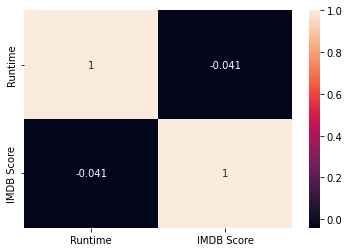

In [21]:
sns.heatmap(flix.corr(), annot=True)

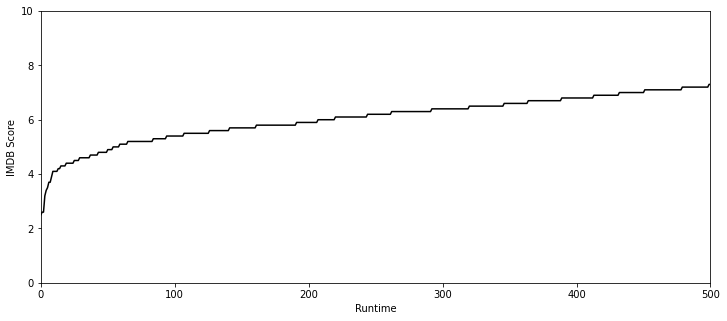

In [22]:
# Plotting with index along the x-axis
flix['IMDB Score'].plot(figsize=(12, 5), color='black')
plt.xlim(0, 500) # range for x-axis
plt.ylim(0, 10) # range for x-axis
plt.xlabel('Runtime')
plt.ylabel('IMDB Score');

<AxesSubplot:xlabel='IMDB Score', ylabel='Runtime'>

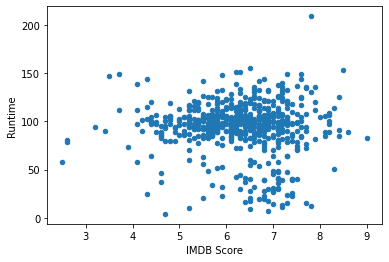

In [23]:
flix.plot.scatter('IMDB Score', 'Runtime')

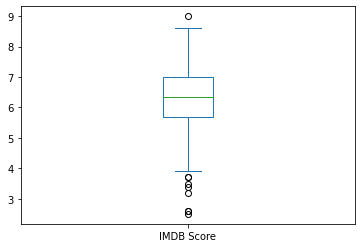

In [24]:
flix['IMDB Score'].plot.box();

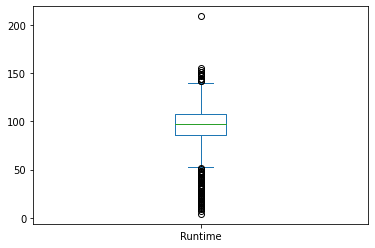

In [25]:
flix['Runtime'].plot.box();

<AxesSubplot:>

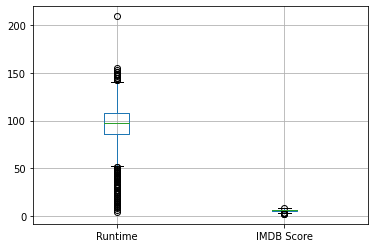

In [26]:
flix.boxplot()

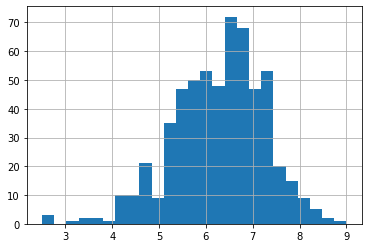

In [29]:
flix['IMDB Score'].hist(bins = 25);

(0.0, 80.0)

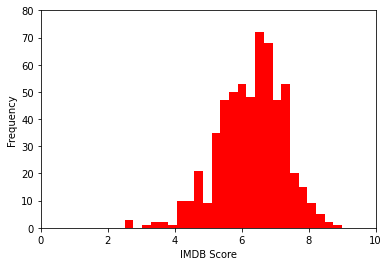

In [31]:
ax = flix['IMDB Score'].hist(bins = 25, grid = False, color = 'red');

ax.set_xlabel('IMDB Score')
ax.set_ylabel('Frequency')

ax.set_xlim(0, 10)
ax.set_ylim(0, 80)

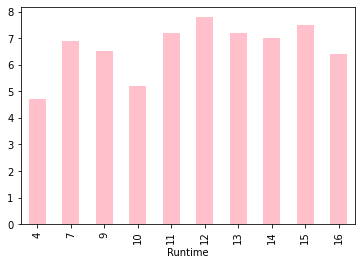

In [40]:
flix_bp = flix.groupby('Runtime')['IMDB Score'].mean()
flix_bp[:10].plot.bar(color = 'pink');

Text(0, 0.5, 'IMDB Score/Runtime')

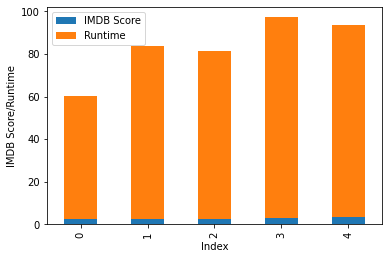

In [43]:
ax = flix[['IMDB Score', 'Runtime']][:5].plot.bar(stacked=True)

ax.set_xlabel('Index')
ax.set_ylabel('IMDB Score/Runtime')